In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import wordcloud
# ^^^ pyforest auto-imports - don't write above this line
#https://github.com/kapsali29/sentiment-Spark/blob/master/Pyspark-sent_analysis.ipynb
#https://www.kdnuggets.com/2019/05/analyzing-tweets-nlp-spark-optimus-twint.html/2

In [2]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('Yelp-Vis').getOrCreate()
sc.stop()
sc = SparkContext("local[*]")
spark = SparkSession(sc).builder.getOrCreate()
spark.sparkContext.setLogLevel("ERROR")

In [4]:
#1. Clean the dataset
data = spark.read.csv("C:\\Users\\alire\\Desktop\\Scalable\\Final\\yelp_review.csv",inferSchema=True,header=True)
#df = spark.read.format("csv").option("header", "true").option("multiline","true").load("C:\\Users\\alire\\Desktop\\Scalable\\yelp_review.csv")
data.printSchema()
data.show()

root
 |-- review_id: string (nullable = true)
 |-- user_id: string (nullable = true)
 |-- business_id: string (nullable = true)
 |-- stars: string (nullable = true)
 |-- date: string (nullable = true)
 |-- text: string (nullable = true)
 |-- useful: string (nullable = true)
 |-- funny: string (nullable = true)
 |-- cool: string (nullable = true)

+--------------------+--------------------+--------------------+-----+----------+--------------------+------+-----+----+
|           review_id|             user_id|         business_id|stars|      date|                text|useful|funny|cool|
+--------------------+--------------------+--------------------+-----+----------+--------------------+------+-----+----+
|vkVSCC7xljjrAI4UG...|bv2nCi5Qv5vroFiqK...|AEx2SYEUJmTxVVB18...|    5|2016-05-28|Super simple plac...|  null| null|null|
|Staff was very he...|                   0|                   0|    0|      null|                null|  null| null|null|
|n6QzIUObkYshz4dz2...|bv2nCi5Qv5vroFiqK...|VR6

In [5]:
data = data.withColumn("label", data["stars"].cast("double"))
data = data.dropna(subset=['label', 'text'])

data = data.select('text','label')
data=data.filter(data['label']<=5.0)
data=data.filter(data['label']>0.0)
data.show()

+--------------------+-----+
|                text|label|
+--------------------+-----+
|Super simple plac...|  5.0|
|Small unassuming ...|  5.0|
|Lester's is locat...|  5.0|
|Love coming here....|  4.0|
|Had their chocola...|  4.0|
|Cycle Pub Las Veg...|  5.0|
|Who would have gu...|  4.0|
|Always drove past...|  4.0|
|Not bad!! Love th...|  3.0|
|    Love this place!|  5.0|
|This is currently...|  4.0|
|Server was a litt...|  3.0|
|I thought Tidy's ...|  1.0|
|Wanted to check o...|  3.0|
|This place is awe...|  5.0|
|a must stop when ...|  4.0|
|I too have been t...|  1.0|
|Came here with my...|  3.0|
|Came here for a b...|  3.0|
|really excited to...|  1.0|
+--------------------+-----+
only showing top 20 rows



In [6]:
(training,testing) = data.randomSplit([0.903,0.097],seed=100)
testing.show()
print('Number of rows (Test dataset)=',testing.count())

+--------------------+-----+
|                text|label|
+--------------------+-----+
|   !!! STAY AWAY!!!!|  1.0|
|"$2 dollar tacos ...|  4.0|
|"$7 toast and $16...|  1.0|
|"...and if you ev...|  4.0|
|"0\/0 Stars. 6 mo...|  1.0|
|"1. Remodeled roo...|  3.0|
|"2.5 stars, reall...|  2.0|
|"3 of us missed o...|  2.0|
|"5 stars for the ...|  3.0|
|"A ""home cooked"...|  3.0|
|"A French inspire...|  3.0|
|"A bald headed fa...|  1.0|
|"A fellow Yelper ...|  3.0|
|"A friend and I h...|  5.0|
|"A friend and I w...|  5.0|
|"A good haircut i...|  5.0|
|"A good""away fro...|  4.0|
|"A great happy ho...|  3.0|
|"A little hard to...|  4.0|
|"A name that impl...|  2.0|
+--------------------+-----+
only showing top 20 rows

Number of rows (Test dataset)= 525908


In [7]:
dff = testing.toPandas()


In [17]:
import re
import string
import pandas as pd

def clean_text_round1(text):
    '''Make text lowercase, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

round1 = lambda x: clean_text_round1(x)


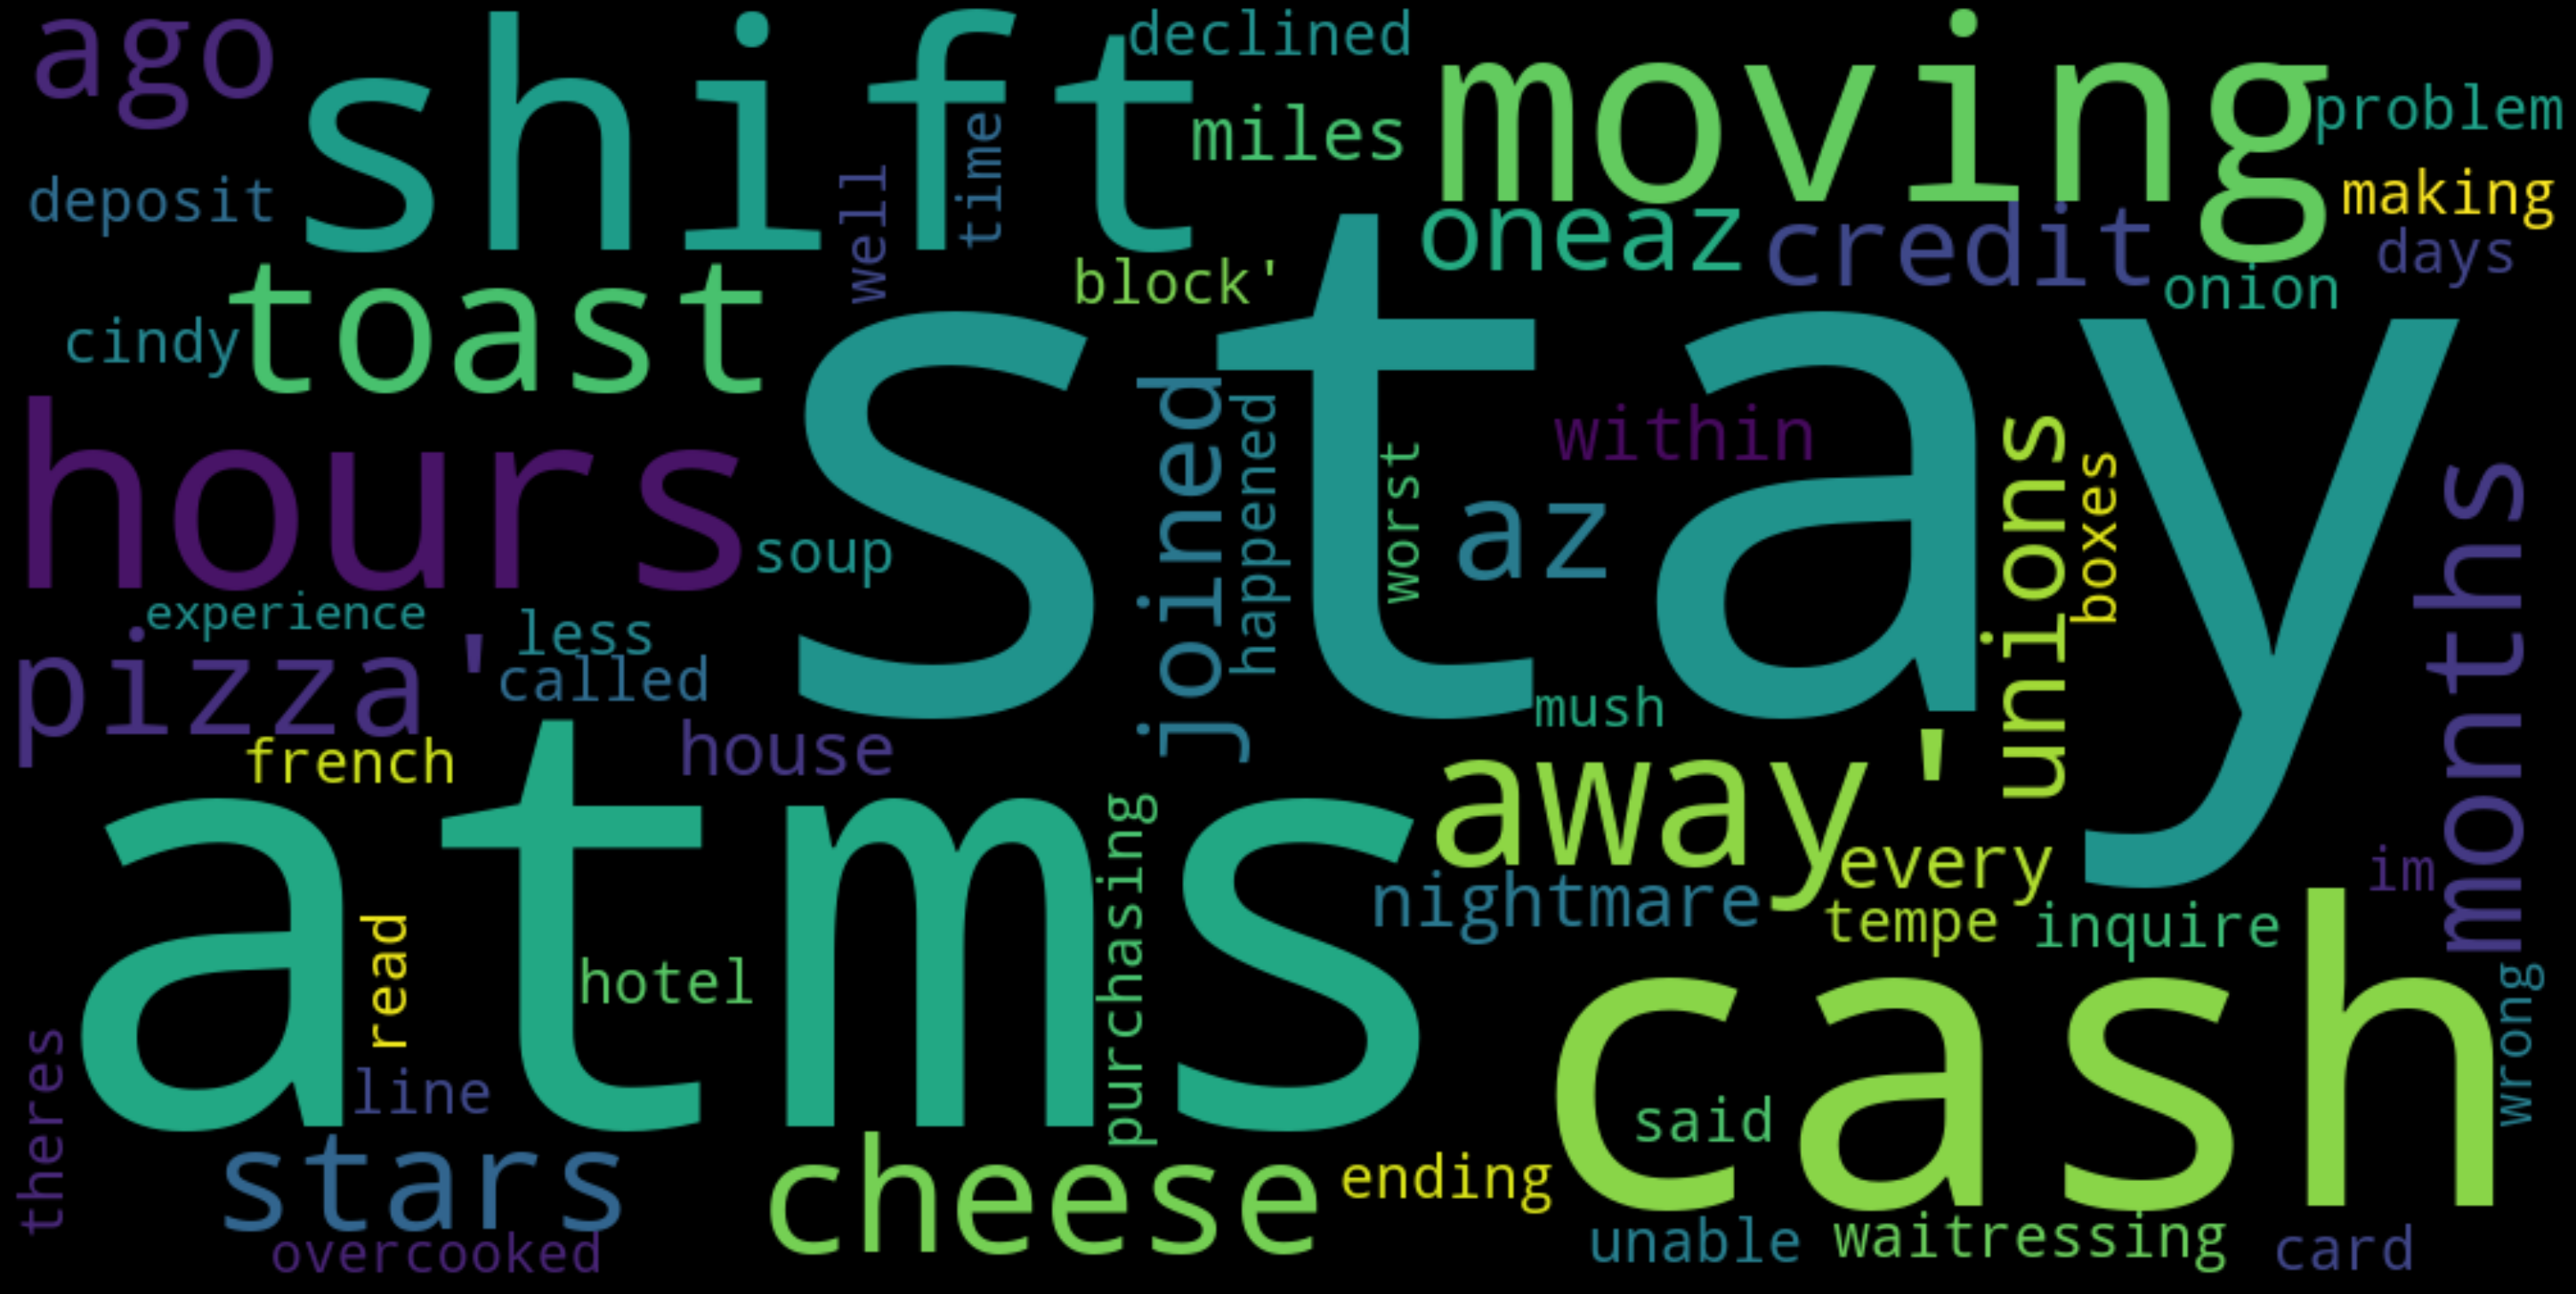

In [36]:
dff_1=dff.loc[dff.label==1.0] #record with 1 star
dff_1 = pd.DataFrame(dff_1.text.apply(round1))
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
text1 = dff_1.text.values
wordcloud = WordCloud(
    width = 1000,
    height = 500,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text1))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()



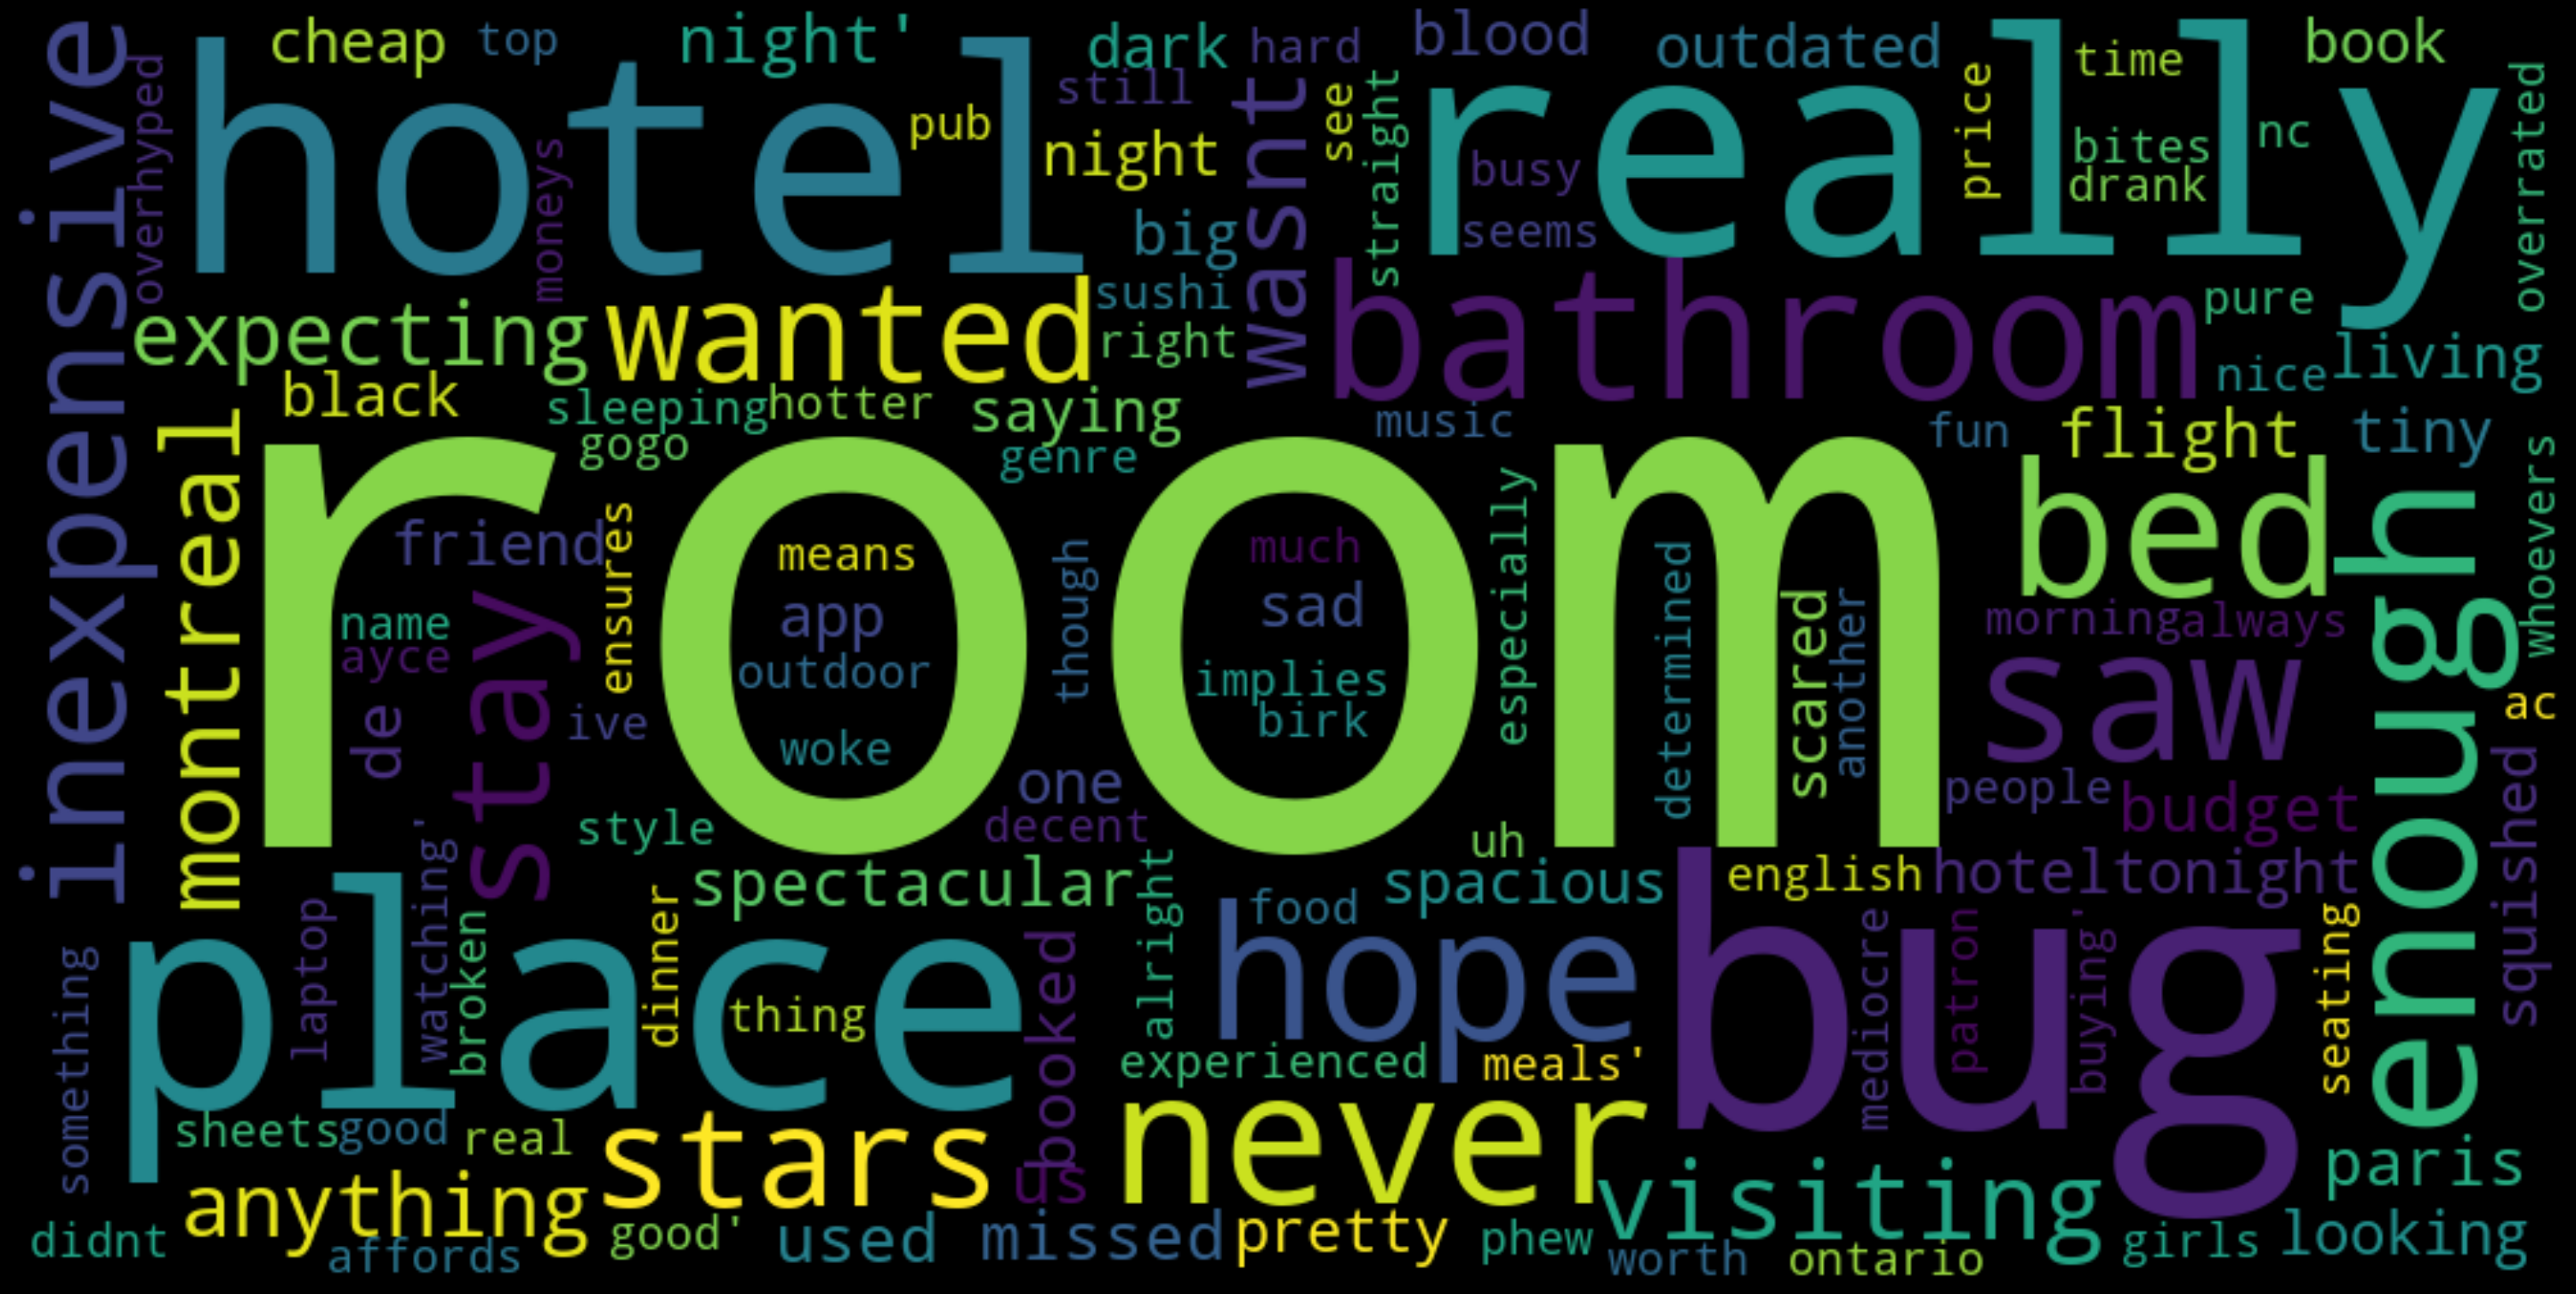

In [37]:
dff_2=dff.loc[dff.label==2.0] #record with 2 stars
dff_2 = pd.DataFrame(dff_2.text.apply(round1))
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
text2 = dff_2.text.values
wordcloud = WordCloud(
    width = 1000,
    height = 500,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text2))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()


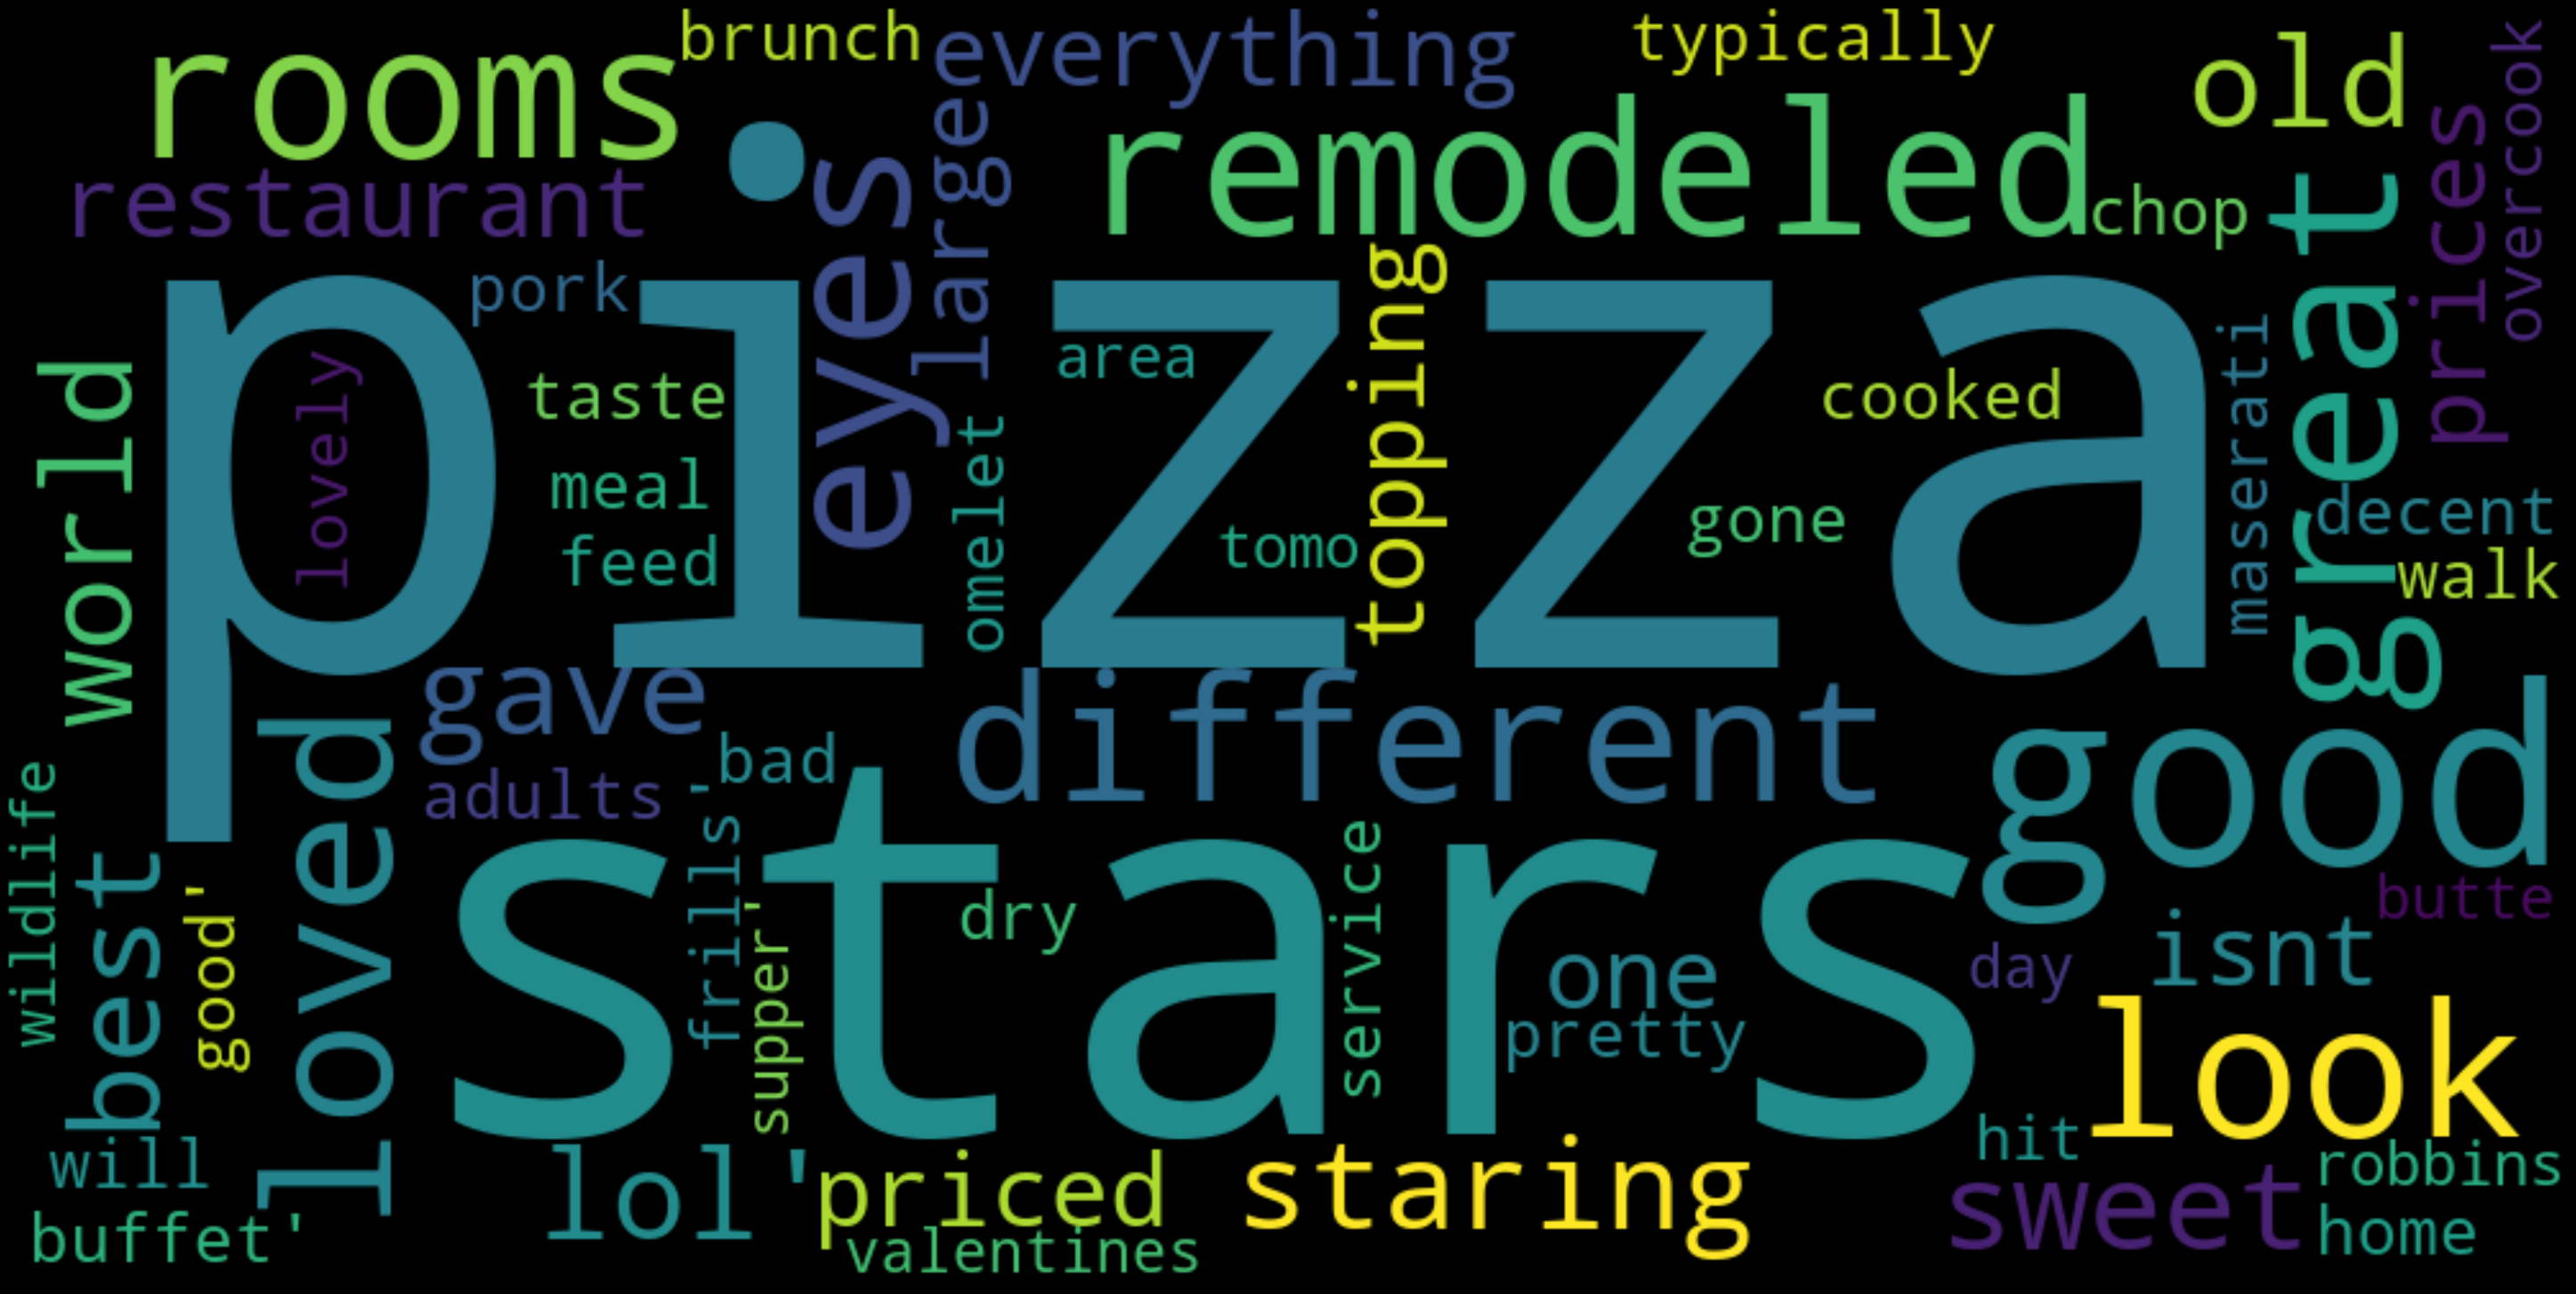

In [38]:
dff_3=dff.loc[dff.label==3.0] #record with 3 stars
dff_3 = pd.DataFrame(dff_3.text.apply(round1))
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
text3 = dff_3.text.values
wordcloud = WordCloud(
    width = 1000,
    height = 500,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text3))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()


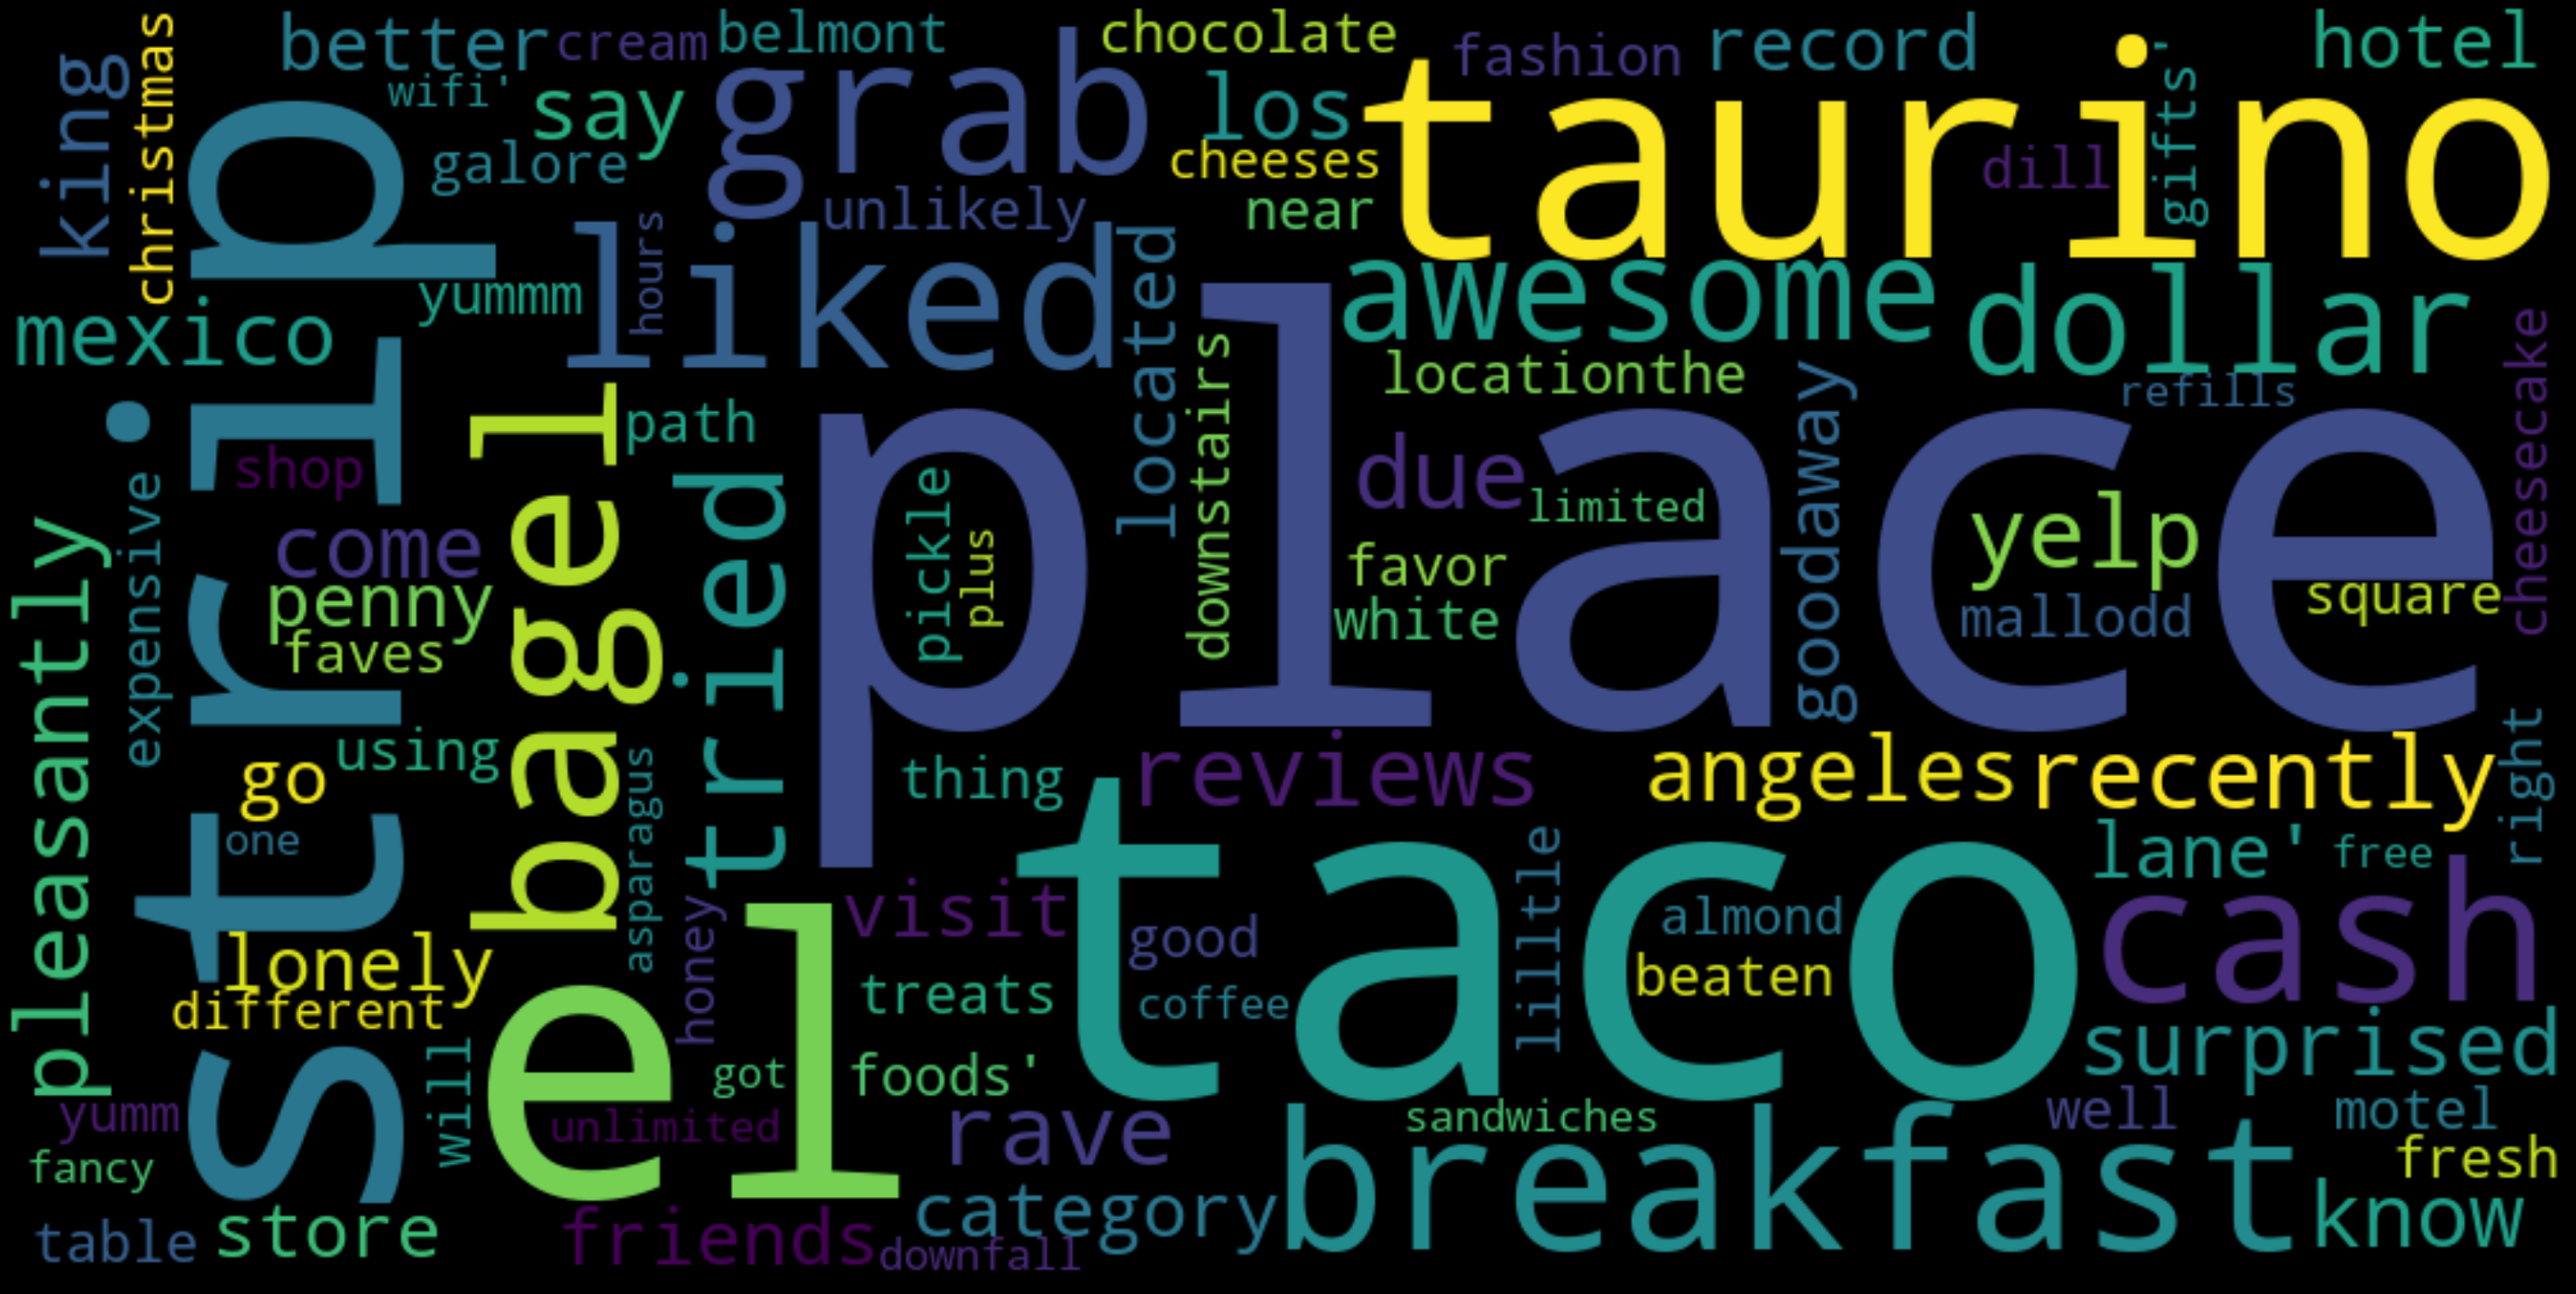

In [39]:
dff_4=dff.loc[dff.label==4.0] #record with 4 stars
dff_4 = pd.DataFrame(dff_4.text.apply(round1))
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
text4 = dff_4.text.values
wordcloud = WordCloud(
    width = 1000,
    height = 500,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text4))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()



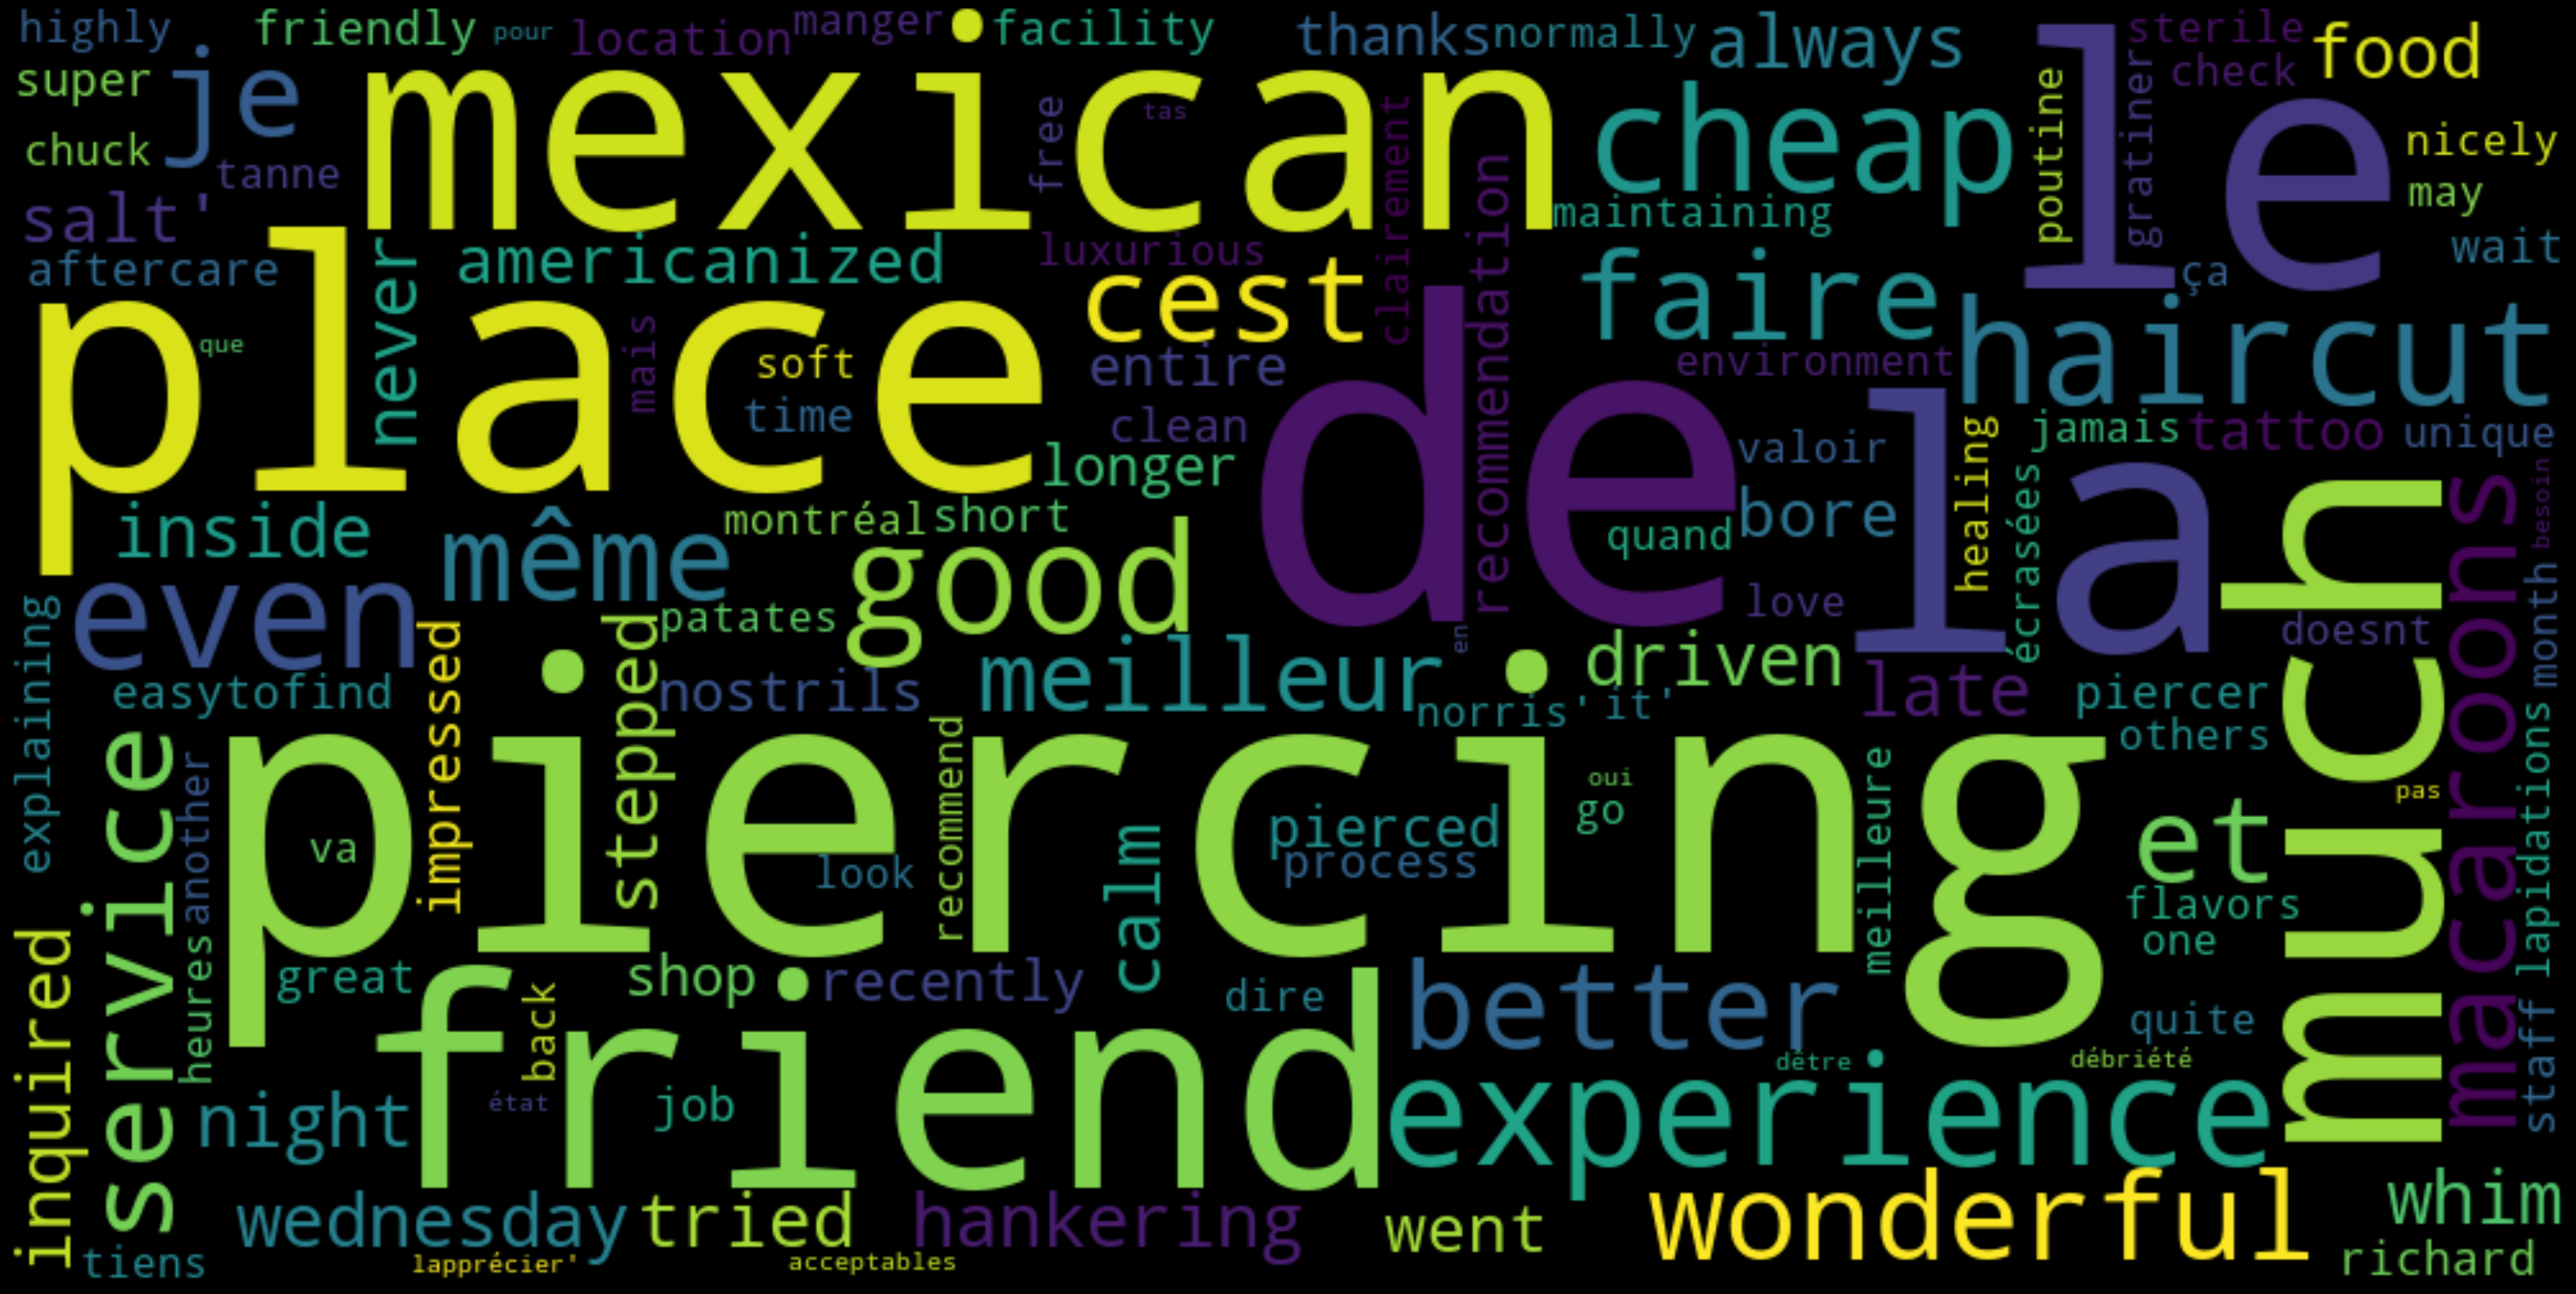

In [40]:
dff_5=dff.loc[dff.label==5.0] #record with 5 stars
dff_5 = pd.DataFrame(dff_5.text.apply(round1))
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
text5 = dff_5.text.values
wordcloud = WordCloud(
    width = 1000,
    height = 500,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text5))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()